# 分位数法

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 生成多特征随机数据
np.random.seed(42)
n_samples = 300
n_features = 3

# 生成正常数据

# np.random.randn生成标准正态分布的数据
# 使用np.random.normal生成正态分布的数据
X_normal = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))

# 添加15个异常值点，np.random.choice指从n_samples中随机选择15个不重复的索引
outlier_indices = np.random.choice(n_samples, size=15, replace=False)
# 为异常值点添加较大的偏移，即使用np.random.uniform生成6到10之间的随机数
X_normal[outlier_indices] = X_normal[outlier_indices] + np.random.uniform(6, 10, size=(15, n_features))

# 转换为DataFrame以便更好地展示
df = pd.DataFrame(X_normal, columns=[f'Feature_{i+1}' for i in range(3)])

print("原始数据的形状:", df.shape)
print("原始数据的前5行:")
print(df.head())

# 使用分位数法检测异常值
# 通常使用IQR方法（四分位距法）
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# 定义异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\n下界:", lower_bound)
print("上界:", upper_bound)

# 检测异常值
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
print(f"\n检测到的异常值数量: {outliers.sum()}")

# 移除异常值
df_clean = df[~outliers]
print(f"清洗后的数据形状: {df_clean.shape}")

原始数据的形状: (300, 3)
原始数据的前5行:
   Feature_1  Feature_2  Feature_3
0   0.496714  -0.138264   0.647689
1   1.523030  -0.234153  -0.234137
2   1.579213   0.767435  -0.469474
3   0.542560  -0.463418  -0.465730
4   8.161551   6.830591   4.344601

下界: Feature_1   -2.322008
Feature_2   -2.993221
Feature_3   -2.767597
dtype: float64
上界: Feature_1    2.413100
Feature_2    3.038222
Feature_3    3.063925
dtype: float64

检测到的异常值数量: 20
清洗后的数据形状: (280, 3)


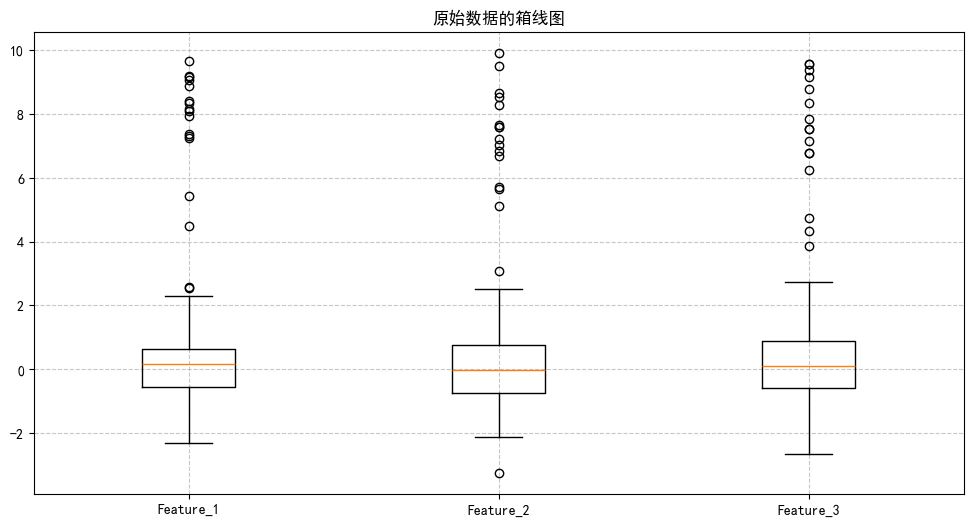

原始数据形状: (300, 3)
检测到的异常值数量: 20
清洗后的数据形状: (280, 3)


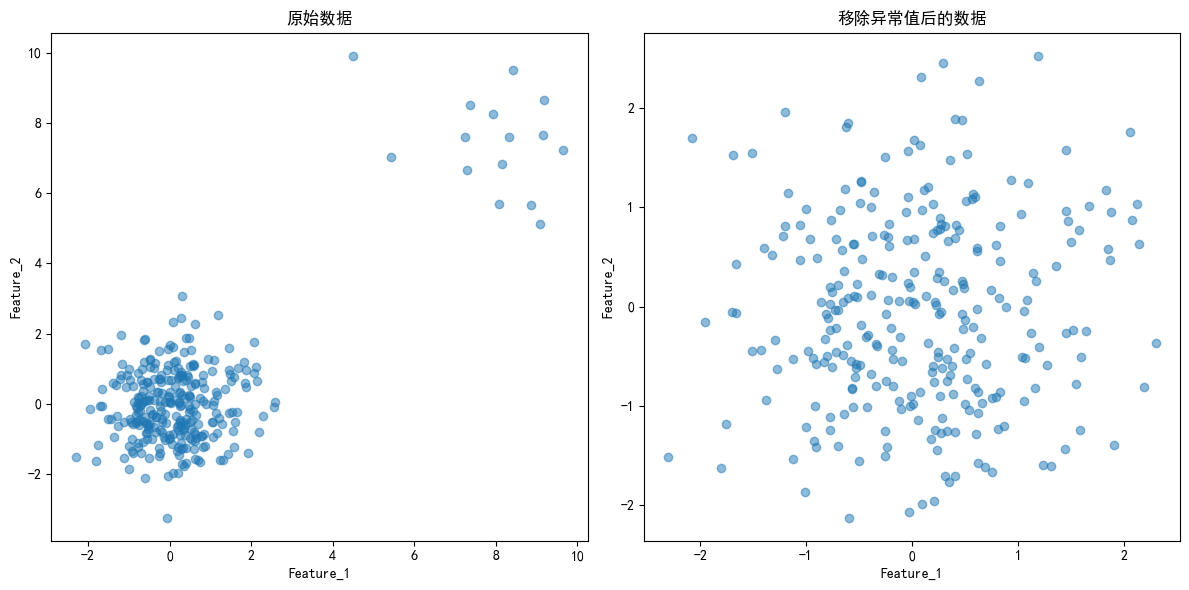

In [18]:

# 可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
# 绘制原始数据的箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(df, labels=df.columns)
plt.title('原始数据的箱线图')
plt.grid(True, linestyle='--', alpha=0.7)#
plt.show()

# 可视化展示（以Feature_1和Feature_2为例）
plt.figure(figsize=(12, 6))

print(f"原始数据形状: {df.shape}")
print(f"检测到的异常值数量: {outliers.sum()}")
print(f"清洗后的数据形状: {df_clean.shape}")

plt.subplot(1, 2, 1)
plt.scatter(df['Feature_1'], df['Feature_2'], alpha=0.5)
plt.title('原始数据')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.subplot(1, 2, 2)
plt.scatter(df_clean['Feature_1'], df_clean['Feature_2'], alpha=0.5)
plt.title('移除异常值后的数据')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

plt.tight_layout()
plt.show()


# z-score标准化后的绝对值大于了3.5的数据就是异常值

In [19]:
# 使用z-score标准化数据
from scipy import stats
import numpy as np

# 计算z-score，stats.zscore接口，计算每个特征的z-score
z_scores = stats.zscore(df.iloc[:, 0:2])

# 找出z-score绝对值大于3.5的点（异常值）
z_outliers = np.abs(z_scores) > 3.5

# 输出每个特征的异常值数量
print("基于z-score方法检测到的异常值数量（阈值=3.5）:")
print(z_outliers.sum())


基于z-score方法检测到的异常值数量（阈值=3.5）:
21


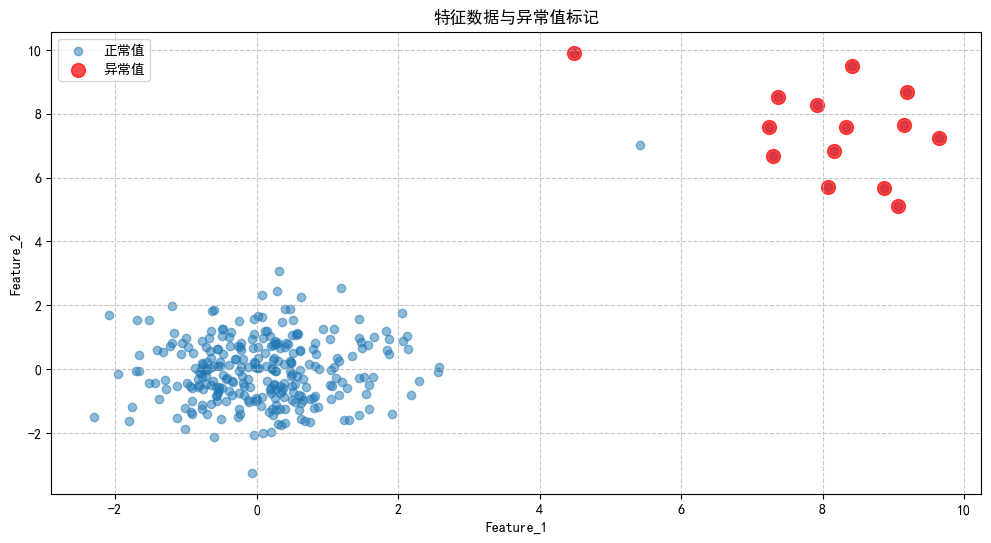

In [20]:

# 可视化展示异常值（以Feature_1和Feature_2为例）并突出显示异常值
plt.figure(figsize=(12, 6))

# 绘制所有数据点
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.5, label='正常值')

# 找出Feature_1或Feature_2中有异常值的行
feature_1_outliers = z_outliers[:, 0]  # 第一列的异常值
feature_2_outliers = z_outliers[:, 1]  # 第二列的异常值
combined_outliers = np.logical_or(feature_1_outliers, feature_2_outliers)

# 获取异常值点
outlier_points = df.iloc[combined_outliers]

# 用红色标记异常值
plt.scatter(outlier_points.iloc[:, 0], outlier_points.iloc[:, 1], 
            color='red', alpha=0.7, s=100, label='异常值')

plt.title('特征数据与异常值标记')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



# DBSCAN密度聚类显示异常值

In [21]:
# 使用DBSCAN算法检测异常值
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import pandas as pd

# 生成数据,make_blobs接口，生成数据,生成1000个数据点二维ndarray，随机状态为170指定了随机种子
n_samples = 1000
random_state = 170
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)

print(X[0:5])
print(X.shape)
print(_[0:5])

[[-7.4967699  -4.7957783 ]
 [-9.8769782  -6.82851017]
 [ 2.48085567  0.12830643]
 [ 1.70141756  0.02592209]
 [-9.2560107  -5.9561846 ]]
(1000, 2)
[0 0 2 2 0]


In [22]:

# 添加一些离群点
X = np.vstack([X, np.array([[8, 8], [-8, -8], [8, -8], [-8, 8], [12, 0], [-12, 0], [0, 12], [0, -12]])])

# 将数据转换为DataFrame以便于处理
df_dbscan = pd.DataFrame(X, columns=['x', 'y'])

# 标准化数据
X = StandardScaler().fit_transform(df_dbscan.iloc[:, 0:2])

# 应用DBSCAN算法
# eps: 邻域半径，min_samples: 成为核心点所需的最小样本数
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# -1表示异常点（噪声点）
outliers_mask = clusters == -1

# 打印聚类标签值的分布情况
unique_labels, counts = np.unique(clusters, return_counts=True)
print("聚类标签值分布:")
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"异常值 ({label}): {count} 个点")
    else:
        print(f"聚类 {label}: {count} 个点")

# 显示带有聚类标签的数据前几行
print("\n带聚类标签的数据前5行:")
print(df_dbscan.head())


聚类标签值分布:
异常值 (-1): 7 个点
聚类 0: 1001 个点

带聚类标签的数据前5行:
          x         y
0 -7.496770 -4.795778
1 -9.876978 -6.828510
2  2.480856  0.128306
3  1.701418  0.025922
4 -9.256011 -5.956185


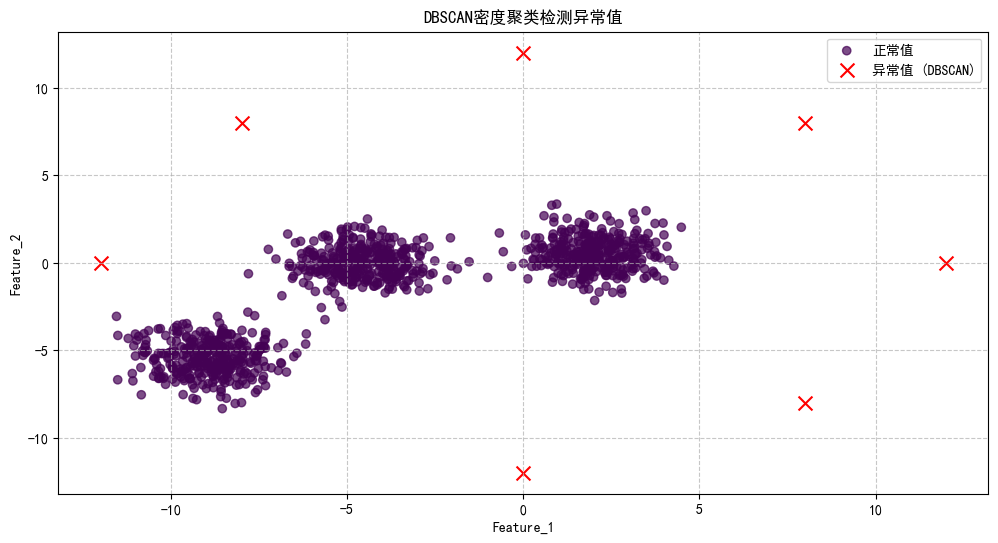

In [23]:
# 可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 可视化DBSCAN聚类结果
plt.figure(figsize=(12, 6))

# 绘制正常点
plt.scatter(df_dbscan.iloc[~outliers_mask, 0], df_dbscan.iloc[~outliers_mask, 1], 
            c=clusters[~outliers_mask], cmap='viridis', 
            marker='o', alpha=0.7, label='正常值')

# 绘制异常点
plt.scatter(df_dbscan.iloc[outliers_mask, 0], df_dbscan.iloc[outliers_mask, 1], 
            color='red', marker='x', s=100, label='异常值 (DBSCAN)')

plt.title('DBSCAN密度聚类检测异常值')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# 孤立森林

In [ ]:
# 举一个有关孤立森林的例子，并让我能很好的理解
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 创建一个包含异常值的数据集
# 随机生成300个数据点
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(100, 2)  # 2维数据,2列好画图来解释

# 创建DataFrame以便于处理
df1 = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# 应用孤立森林算法
# contamination参数表示预期的异常值比例，300*0.05=15
# n_estimators参数表示构建的孤立树的数量其不一定等于特征数，max_samples参数表示每次构建孤立树时随机选择的样本数量
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)


# 训练模型并预测
predictions = clf.fit_predict(X) #预测结果是-1表示异常，1表示正常

# 创建异常值和正常值的掩码，是-1表示异常，1表示正常
outliers_mask = predictions == -1 #bool类型
inliers_mask = predictions == 1 #bool类型

# 计算异常值数量
anomaly_count = np.sum(outliers_mask)
print(f"孤立森林检测到的异常值数量: {anomaly_count}")
print("\n带异常标签的数据前5行:")
print(df1.head())

孤立森林检测到的异常值数量: 10

带异常标签的数据前5行:
   Feature_1  Feature_2
0   0.374540   0.950714
1   0.731994   0.598658
2   0.156019   0.155995
3   0.058084   0.866176
4   0.601115   0.708073


In [31]:
outliers_mask

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False])

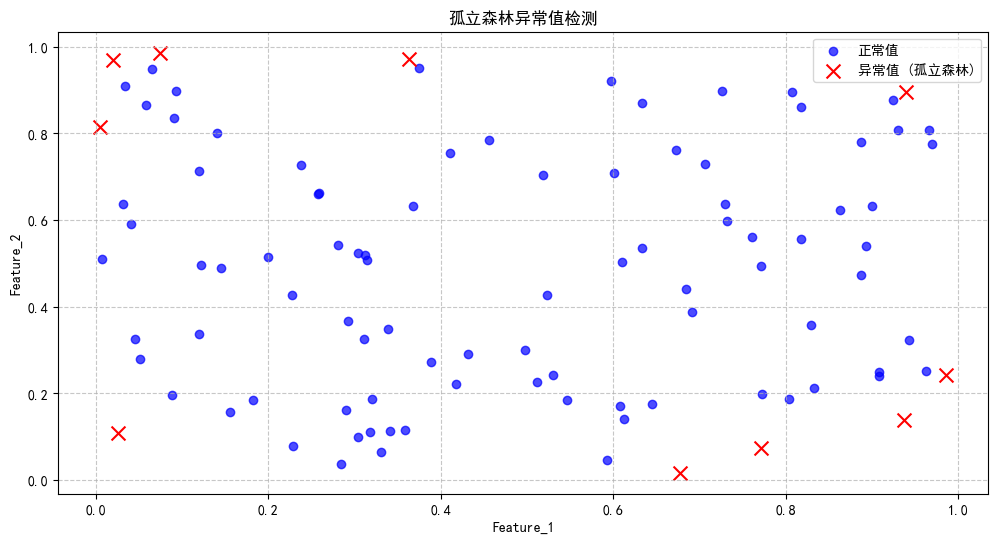


孤立森林原理解释:
1. 孤立森林基于一个简单的观察：在随机特征空间中，异常值更容易被'孤立'
2. 算法构建多棵'孤立树'，每棵树通过随机选择特征和分割点来分割数据
3. 异常值通常需要较少的分割就能被孤立（即到达叶节点的路径较短）
4. 正常值通常需要更多分割才能被孤立（即到达叶节点的路径较长）
5. 算法计算每个点被孤立的平均路径长度，路径越短，越可能是异常值


In [29]:

# 可视化结果
plt.figure(figsize=(12, 6))

# 绘制正常点
normal = df1[inliers_mask]
plt.scatter(normal['Feature_1'], normal['Feature_2'], 
            c='blue', marker='o', alpha=0.7, label='正常值')

# 绘制异常点
anomaly = df1[outliers_mask]
plt.scatter(anomaly['Feature_1'], anomaly['Feature_2'], 
            c='red', marker='x', s=100, label='异常值 (孤立森林)')

plt.title('孤立森林异常值检测')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 孤立森林原理解释
print("\n孤立森林原理解释:")
print("1. 孤立森林基于一个简单的观察：在随机特征空间中，异常值更容易被'孤立'")
print("2. 算法构建多棵'孤立树'，每棵树通过随机选择特征和分割点来分割数据")
print("3. 异常值通常需要较少的分割就能被孤立（即到达叶节点的路径较短）")
print("4. 正常值通常需要更多分割才能被孤立（即到达叶节点的路径较长）")
print("5. 算法计算每个点被孤立的平均路径长度，路径越短，越可能是异常值")

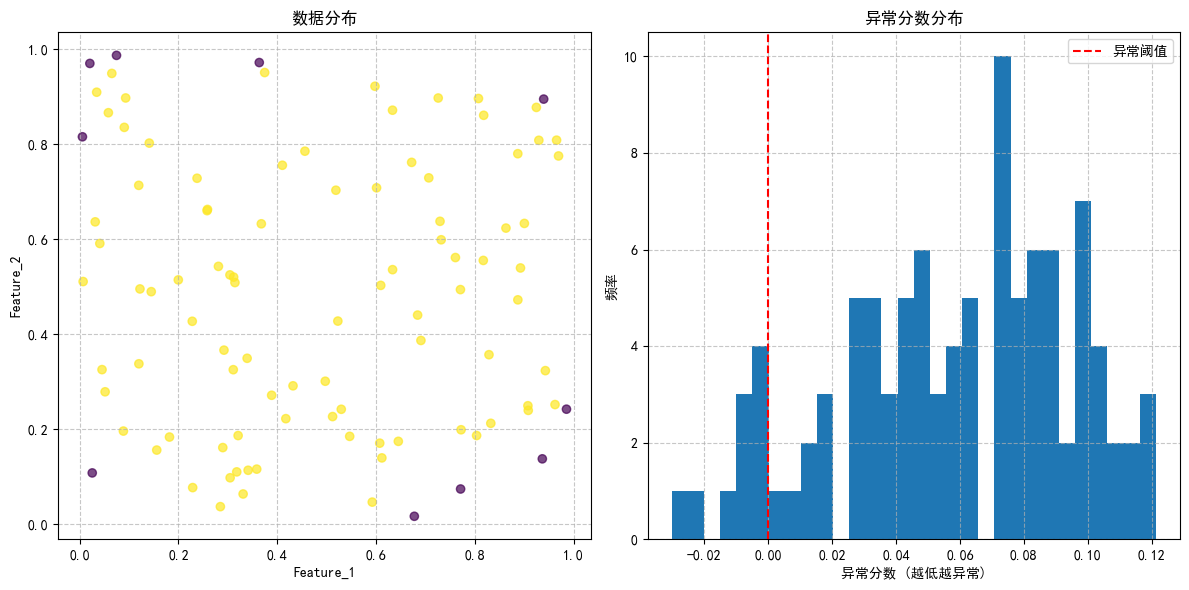

In [30]:

# 可视化孤立森林的工作原理
plt.figure(figsize=(12, 6))

# 左图：显示数据点
plt.subplot(1, 2, 1)
plt.scatter(df1['Feature_1'], df1['Feature_2'], c=predictions, 
            cmap='viridis', marker='o', alpha=0.7)
plt.title('数据分布')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.grid(True, linestyle='--', alpha=0.7)

# 右图：显示异常分数
plt.subplot(1, 2, 2)
# 计算异常分数（越低越异常）
scores = clf.decision_function(X)
plt.hist(scores, bins=30)
plt.axvline(x=0, color='r', linestyle='--', label='异常阈值')
plt.title('异常分数分布')
plt.xlabel('异常分数 (越低越异常)')
plt.ylabel('频率')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()